In [17]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential

from keras import backend as k
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [26]:
def f(x):
    # quadratic
    return ((x - 5)**2)/25.0

def df(x):
    # derivative of quadratic is linear
    return 2*(x - 5) / 25.0

# sample size
n = 1000
# these will be my training data sets, with regular sampling
x = np.linspace(0,10,n)
y = f(x)

# split train/val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15)

# normalize
# x = x / 10

# get test data too, but randomly sampled
# x_test = 10*np.random.ranf(20)
# y_test = f(x_test)
# x_test = x_test / 10

plt.plot(x,y, label='training points')
plt.plot(x_val,y_val, 'ko', label='test data')
plt.legend()

print('___')
print(x_val)
print(x_val.shape)

___
[ 4.91491491  6.93693694  5.95595596  5.88588589  2.96296296  2.46246246
  7.15715716  7.45745746  6.20620621  5.08508509  3.62362362  0.14014014
  9.54954955  1.001001    6.45645646  2.1021021   4.06406406  1.72172172
  8.30830831  0.15015015  3.49349349  0.44044044  6.43643644  0.82082082
  6.08608609  2.5025025   6.10610611  2.8028028   7.87787788  7.48748749
  4.02402402  2.87287287  4.33433433  3.02302302  0.3003003   2.67267267
  5.18518519  9.70970971  5.47547548  0.7007007   5.62562563  5.78578579
 10.          1.62162162  4.22422422  7.18718719  1.23123123  4.25425425
  8.70870871  5.15515516  4.87487487  7.97797798  7.41741742  6.2962963
  6.26626627  2.19219219  9.06906907  2.2022022   0.62062062  9.97997998
  0.49049049  2.84284284  8.93893894  5.00500501  5.60560561  9.58958959
  6.8968969   3.01301301  0.48048048  0.83083083  8.76876877  1.86186186
  4.68468468  9.88988989  8.45845846  9.40940941  8.24824825  2.15215215
  3.08308308  8.20820821  1.32132132  5.37537538

In [19]:
model = Sequential()
# 1d input
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Activation("linear"))
model.add(Dense(32, activation='relu'))
model.add(Activation("linear"))
model.add(Dense(32, activation='relu'))
# 1d output
model.add(Dense(1))

# minimize mse
model.compile(loss='mse', optimizer='adam', metrics=["accuracy"])


model.fit(x, y,
          batch_size=10,
          epochs=25,
          verbose=0,
          validation_data=(x_val, y_val))

## compute derivative (gradient)
session = k.get_session()
# session.run(tf.global_variables_initializer())
y_val_d_evaluated = session.run(tf.gradients(model.output, model.input), feed_dict={model.input: x_val.reshape(len(x_val), 1)})

print(y_val_d_evaluated)

[array([[ 0.02917087],
       [-0.33106625],
       [-0.07538837],
       [ 0.32704112],
       [-0.07538837],
       [ 0.17866257],
       [-0.16865748],
       [ 0.02917087],
       [ 0.17866257],
       [-0.33106625],
       [-0.31717408],
       [ 0.32704112],
       [ 0.32704112],
       [-0.31717408],
       [ 0.07287371],
       [ 0.25594902],
       [ 0.25594902],
       [-0.30495685],
       [-0.07538837],
       [-0.16853617],
       [-0.37502933],
       [ 0.23112163],
       [-0.18275361],
       [-0.07538837],
       [-0.07538837],
       [-0.07538837],
       [-0.30495685],
       [-0.00994739],
       [ 0.17866257],
       [ 0.23112163],
       [-0.07538837],
       [ 0.23112163],
       [ 0.32704112],
       [-0.07538837],
       [-0.23811704],
       [-0.16865748],
       [ 0.07287371],
       [ 0.32704112],
       [ 0.17866257],
       [ 0.32704112],
       [-0.35769475],
       [ 0.02917087],
       [-0.16865748],
       [ 0.02917087],
       [ 0.32704112],
       [ 

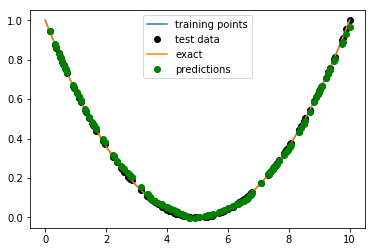

In [20]:
y_result = model.predict(x_val)
plt.plot(x,y, label='exact')
plt.plot(x_val, y_result, 'go', label='predictions')
plt.legend()
plt.show()

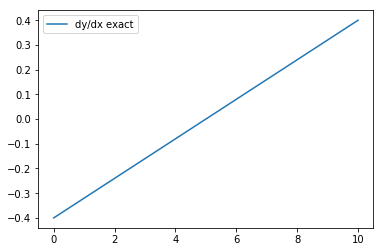

In [21]:
plt.plot(x, df(x), label='dy/dx exact')
plt.legend()
plt.show()

In [32]:
## compute derivative (gradient)
session = k.get_session()
# session.run(tf.global_variables_initializer())
y_val_d_evaluated = session.run(tf.gradients(model.output, model.input), feed_dict={model.input: x_val.reshape(len(x_val), 1)})

for i in range(10):
    print(x_val[i], '-', y_val_d_evaluated[0][i], '-', df(x_val[i]))

4.914914914914915 - [0.02917087] - -0.006806806806806804
6.936936936936937 - [0.17866257] - 0.15495495495495498
5.955955955955956 - [0.07287371] - 0.07647647647647644
5.885885885885886 - [0.07287371] - 0.07087087087087085
2.962962962962963 - [-0.16853617] - -0.16296296296296298
2.4624624624624625 - [-0.16865748] - -0.203003003003003
7.157157157157157 - [0.17866257] - 0.17257257257257258
7.4574574574574575 - [0.17866257] - 0.1965965965965966
6.206206206206206 - [0.07287371] - 0.09649649649649646
5.085085085085085 - [0.02917087] - 0.006806806806806804


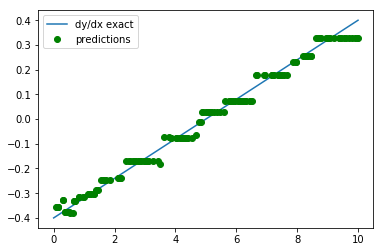

In [33]:
plt.plot(x, df(x), label='dy/dx exact')
plt.plot(x_val, y_val_d_evaluated[0], 'go', label='predictions')
plt.legend()
plt.show()

In [34]:
for i in range(len(x_val)):
    if x_val[i] > 3 and x_val[i] < 4:
        print(x_val[i], '-', y_val_d_evaluated[0][i], '-', df(x_val[i]))

3.6236236236236237 - [-0.07298535] - -0.11011011011011011
3.4934934934934936 - [-0.18275361] - -0.12052052052052051
3.023023023023023 - [-0.16853617] - -0.15815815815815817
3.013013013013013 - [-0.16853617] - -0.15895895895895898
3.083083083083083 - [-0.16853617] - -0.15335335335335337
3.843843843843844 - [-0.07538837] - -0.0924924924924925
3.2732732732732734 - [-0.16853617] - -0.13813813813813813
3.113113113113113 - [-0.16853617] - -0.15095095095095096
3.4434434434434436 - [-0.16853617] - -0.12452452452452452
3.863863863863864 - [-0.07538837] - -0.09089089089089089
3.803803803803804 - [-0.07298535] - -0.09569569569569569
3.093093093093093 - [-0.16853617] - -0.15255255255255257


In [35]:
outputs = model.output
trainable_variables = model.trainable_weights

In [41]:
gradients = k.gradients(trainable_variables, outputs)

In [42]:
print(gradients)

[None]
